In [1]:
import os
import sys
import datetime

import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
import tqdm

%matplotlib inline

In [2]:
NOW = '{:%H%M%S}'.format(datetime.datetime.now())

ROOT_DIR = os.path.realpath(os.path.join(os.path.abspath(''), '../..'))
OUT_DIR = os.path.join(ROOT_DIR, 'out')
PREDICTIONS_DIR = os.path.join(OUT_DIR, 'predictions')

DATASET_DIR = os.path.join(ROOT_DIR, 'dataset/celeba_')
TEST_DIR = os.path.join(DATASET_DIR, 'test')
TEST_IMAGES_DIR = os.path.join(TEST_DIR, 'original')
TEST_ANNOTATIONS_DIR = os.path.join(TEST_DIR, 'mask')

BEST_MODEL_DIR = os.path.join(OUT_DIR, 'checkpoints/celeba/best')
sys.path.append(ROOT_DIR)

BEST_DIR = os.path.join(PREDICTIONS_DIR, 'predcition_{}'.format(NOW))
if not os.path.exists(BEST_DIR):
    os.makedirs(BEST_DIR)
BLUR_DIR = os.path.join(PREDICTIONS_DIR, 'blur_{}'.format(NOW))
if not os.path.exists(BLUR_DIR):
    os.makedirs(BLUR_DIR)

In [3]:
from keras_segmentation.models.all_models import model_from_name as M
from keras_segmentation.predict import predict, predict_multiple, blur3 as blur, blur_multiple

Using TensorFlow backend.
/home/jho/anaconda3/envs/tf12-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jho/anaconda3/envs/tf12-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jho/anaconda3/envs/tf12-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jho/anaconda3/

In [4]:
def _predictions_(name):
    return os.path.join(PREDICTIONS_DIR, name)



In [5]:
# models = ['unet', 'fcn_8', 'fcn_32', 'mask', 'original']
models_list = os.listdir(BEST_MODEL_DIR)
models = [m[:-3] for m in models_list]

print(models)

['fcn_32', 'fcn_32_vgg16', 'pspnet', 'fcn_8_vgg16', 'unet', 'unet_vgg16', 'segnet', 'fcn_8', 'segnet_vgg16', 'pspnet_vgg16']


In [6]:
weights = {}
for model in models:
    weights[model] = os.path.join(BEST_MODEL_DIR, model + '.h5')
print(weights)

{'fcn_32': '/home/jho/projects/image-segmentation-keras/out/checkpoints/celeba/best/fcn_32.h5', 'fcn_32_vgg16': '/home/jho/projects/image-segmentation-keras/out/checkpoints/celeba/best/fcn_32_vgg16.h5', 'pspnet': '/home/jho/projects/image-segmentation-keras/out/checkpoints/celeba/best/pspnet.h5', 'fcn_8_vgg16': '/home/jho/projects/image-segmentation-keras/out/checkpoints/celeba/best/fcn_8_vgg16.h5', 'unet': '/home/jho/projects/image-segmentation-keras/out/checkpoints/celeba/best/unet.h5', 'unet_vgg16': '/home/jho/projects/image-segmentation-keras/out/checkpoints/celeba/best/unet_vgg16.h5', 'segnet': '/home/jho/projects/image-segmentation-keras/out/checkpoints/celeba/best/segnet.h5', 'fcn_8': '/home/jho/projects/image-segmentation-keras/out/checkpoints/celeba/best/fcn_8.h5', 'segnet_vgg16': '/home/jho/projects/image-segmentation-keras/out/checkpoints/celeba/best/segnet_vgg16.h5', 'pspnet_vgg16': '/home/jho/projects/image-segmentation-keras/out/checkpoints/celeba/best/pspnet_vgg16.h5'}


In [7]:
size = {}
size['fcn_32'] = 256
size['fcn_32_vgg16'] = 256
size['fcn_8'] = 256
size['fcn_8_vgg16'] = 256
size['pspnet'] = 384
size['pspnet_vgg16'] = 384
size['unet'] = 256
size['unet_vgg16'] = 256
size['segnet'] = 256
size['segnet_vgg16'] = 256

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


def plots(model, out_dir=None):
    print(model)
    m = M[model](n_classes=3, input_height=size[model], input_width=size[model])
    m.load_weights(weights[model])
    m.summary()
    
    
    if out_dir is not None:
        out_path = os.path.join(out_dir, model +'.svg')
        plot_model(m, to_file=out_path)
        print("Saved to " + os.path.abspath(out_path))
    print()
        
    
    
    

In [9]:
for model in tqdm.tqdm(models, desc="Plotting..."):
    plots(model)

Plotting...:   0%|          | 0/10 [00:00<?, ?it/s]

fcn_32


Plotting...:  10%|█         | 1/10 [00:01<00:12,  1.40s/it]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 258, 258, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 130, 130, 64)      0         
__________

Plotting...:  20%|██        | 2/10 [00:02<00:10,  1.27s/it]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

Plotting...:  30%|███       | 3/10 [00:03<00:08,  1.20s/it]

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 384, 384, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 386, 386, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 384, 384, 64) 1792        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
batch_normalization_6 (BatchNor (None, 384, 384, 64) 256         conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation

Plotting...:  40%|████      | 4/10 [00:04<00:07,  1.18s/it]

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 1792        input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 256, 256, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 128, 128, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

Plotting...:  50%|█████     | 5/10 [00:05<00:05,  1.15s/it]

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_11 (ZeroPadding2 (None, 258, 258, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 256, 256, 64) 1792        zero_padding2d_11[0][0]          
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 256, 256, 64) 256         conv2d_28[0][0]                  
__________________________________________________________________________________________________
activation

Plotting...:  60%|██████    | 6/10 [00:06<00:04,  1.14s/it]

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 1792        input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 256, 256, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 128, 128, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

Plotting...:  70%|███████   | 7/10 [00:07<00:03,  1.15s/it]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
zero_padding2d_24 (ZeroPaddi (None, 258, 258, 3)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
batch_normalization_29 (Batc (None, 256, 256, 64)      256       
_________________________________________________________________
activation_27 (Activation)   (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
zero_padding2d_25 (ZeroPaddi (None, 130, 130, 64)      0         
__________

Plotting...:  80%|████████  | 8/10 [00:09<00:02,  1.16s/it]

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_33 (ZeroPadding2 (None, 258, 258, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_53 (Conv2D)              (None, 256, 256, 64) 1792        zero_padding2d_33[0][0]          
__________________________________________________________________________________________________
batch_normalization_38 (BatchNo (None, 256, 256, 64) 256         conv2d_53[0][0]                  
__________________________________________________________________________________________________
activation

Plotting...:  90%|█████████ | 9/10 [00:10<00:01,  1.26s/it]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

Plotting...: 100%|██████████| 10/10 [00:12<00:00,  1.22s/it]

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 384, 384, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 384, 384, 64) 1792        input_10[0][0]                   
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 384, 384, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 192, 192, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [10]:
def ep(model, out_dir, blur_dir, save_blur=False):
    print(model)
    out = os.path.join(out_dir, model)
    print(out)
    if not os.path.exists(out):
        os.makedirs(out)
    
    out_blur = os.path.join(blur_dir, model)
    print(out_blur)
    if not os.path.exists(out_blur):
        os.makedirs(out_blur)
        
    m = M[model](n_classes=3, input_height=size[model], input_width=size[model])
    m.load_weights(weights[model])
    evaluation = m.evaluate_segmentation(inp_images_dir=TEST_IMAGES_DIR, annotations_dir=TEST_ANNOTATIONS_DIR)
#     evaluation = ""
    print(evaluation)

    predicts, blurs = predict_multiple(model=m, inps=None, inp_dir=TEST_IMAGES_DIR, out_dir=out, blur_dir=out_blur, save_blur=save_blur)
    
    
    
    return evaluation, predicts, out, blurs

In [11]:
# evaluate & predict
evaluations = {}
predicts = {}
out = {}
blurs = {}

# predicts['fcn_8'], out_dir['fcn_8'] = pe('fcn_8')
out_dir = BEST_DIR
blur_dir = BLUR_DIR
for model in models:
    evaluations[model], predicts[model], out[model], blurs[model] = ep(model, out_dir, blur_dir, save_blur=True)
#     print(predict)

print('FINSHED')

# for model in tqdm.tqdm(models, desc="model"):
#     print(model)
#     out_dir[model] = os.path.join(PREDICTIONS_DIR, 'best/' + model)
#     print(out_dir[model])
#     if not os.path.exists(out_dir[model]):
#         os.makedirs(out_dir[model])
#     m = M[model](n_classes=3, input_height=size[model], input_width=size[model])
    
#     predicts[model] = predict_multiple(model=m, inps=None, inp_dir=TEST_IMAGE_DIR,
#                      out_dir=out_dir[model], 
#                      checkpoints_path=weights[model])

fcn_32
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/fcn_32
/home/jho/projects/image-segmentation-keras/out/predictions/blur_195231/fcn_32


400it [00:12, 30.84it/s]
  1%|          | 4/400 [00:00<00:12, 32.30it/s]

{'frequency_weighted_IU': 0.8604576350416526, 'mean_IU': 0.8230446471670144, 'class_wise_IU(IoU)': array([0.90604135, 0.87672312, 0.68636947]), 'f1_score': array([0.95070482, 0.9343127 , 0.81402027]), 'acc': array([0.93873598, 0.97191964, 0.93867965])}


100%|██████████| 400/400 [00:11<00:00, 35.03it/s]


fcn_32_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/fcn_32_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/blur_195231/fcn_32_vgg16


400it [00:21, 18.87it/s]
  0%|          | 2/400 [00:00<00:19, 19.92it/s]

{'frequency_weighted_IU': 0.8718648075149777, 'mean_IU': 0.836138733456186, 'class_wise_IU(IoU)': array([0.91806975, 0.85458312, 0.73576334]), 'f1_score': array([0.95728505, 0.92159053, 0.84776919]), 'acc': array([0.94836676, 0.96799952, 0.94168132])}


100%|██████████| 400/400 [00:20<00:00, 19.39it/s]


pspnet
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/pspnet
/home/jho/projects/image-segmentation-keras/out/predictions/blur_195231/pspnet


400it [00:04, 81.44it/s]
  2%|▏         | 8/400 [00:00<00:04, 79.39it/s]

{'frequency_weighted_IU': 0.8662228135278571, 'mean_IU': 0.8297138550963821, 'class_wise_IU(IoU)': array([0.91027023, 0.88526216, 0.69360918]), 'f1_score': array([0.95302771, 0.93913958, 0.81909001]), 'acc': array([0.94104004, 0.97401177, 0.94251058])}


100%|██████████| 400/400 [00:05<00:00, 79.37it/s]


fcn_8_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/fcn_8_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/blur_195231/fcn_8_vgg16


400it [00:20, 19.13it/s]
  0%|          | 2/400 [00:00<00:19, 19.90it/s]

{'frequency_weighted_IU': 0.9120717731489217, 'mean_IU': 0.8871972593594677, 'class_wise_IU(IoU)': array([0.9434811 , 0.90967785, 0.80843284]), 'f1_score': array([0.97091873, 0.95270294, 0.89407007]), 'acc': array([0.96470153, 0.98000025, 0.96150941])}


100%|██████████| 400/400 [00:20<00:00, 19.37it/s]


unet
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/unet
/home/jho/projects/image-segmentation-keras/out/predictions/blur_195231/unet


400it [00:03, 101.92it/s]
  3%|▎         | 11/400 [00:00<00:03, 101.26it/s]

{'frequency_weighted_IU': 0.7650149330007543, 'mean_IU': 0.7034001227352461, 'class_wise_IU(IoU)': array([0.84599753, 0.71808013, 0.54612271]), 'f1_score': array([0.91657493, 0.83590994, 0.70644162]), 'acc': array([0.90166443, 0.92056274, 0.90102295])}


100%|██████████| 400/400 [00:04<00:00, 95.89it/s]


unet_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/unet_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/blur_195231/unet_vgg16


400it [00:05, 79.44it/s]
  2%|▏         | 8/400 [00:00<00:04, 79.50it/s]

{'frequency_weighted_IU': 0.9127088460505369, 'mean_IU': 0.8885570973969146, 'class_wise_IU(IoU)': array([0.94311501, 0.9105979 , 0.81195839]), 'f1_score': array([0.97072485, 0.95320727, 0.89622189]), 'acc': array([0.96417328, 0.98034012, 0.96304886])}


100%|██████████| 400/400 [00:05<00:00, 77.44it/s]


segnet
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/segnet
/home/jho/projects/image-segmentation-keras/out/predictions/blur_195231/segnet


400it [00:03, 104.27it/s]
  3%|▎         | 11/400 [00:00<00:03, 103.27it/s]

{'frequency_weighted_IU': 0.8248649893487005, 'mean_IU': 0.783049843976246, 'class_wise_IU(IoU)': array([0.87535775, 0.84740484, 0.62638693]), 'f1_score': array([0.93353682, 0.91740026, 0.77028033]), 'acc': array([0.91834335, 0.96487396, 0.92048386])}


100%|██████████| 400/400 [00:03<00:00, 101.90it/s]


fcn_8
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/fcn_8
/home/jho/projects/image-segmentation-keras/out/predictions/blur_195231/fcn_8


400it [00:11, 33.90it/s]
  1%|          | 4/400 [00:00<00:10, 36.45it/s]

{'frequency_weighted_IU': 0.860749797686285, 'mean_IU': 0.8246423507863397, 'class_wise_IU(IoU)': array([0.90474546, 0.87709744, 0.69208415]), 'f1_score': array([0.94999094, 0.93452521, 0.81802569]), 'acc': array([0.93807399, 0.97196668, 0.93930247])}


100%|██████████| 400/400 [00:11<00:00, 35.03it/s]


segnet_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/segnet_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/blur_195231/segnet_vgg16


400it [00:04, 81.08it/s]
  2%|▏         | 9/400 [00:00<00:04, 81.78it/s]

{'frequency_weighted_IU': 0.8813162120162946, 'mean_IU': 0.8462812603801418, 'class_wise_IU(IoU)': array([0.9265923 , 0.8640255 , 0.74822599]), 'f1_score': array([0.96189764, 0.9270533 , 0.85598314]), 'acc': array([0.95230118, 0.97070374, 0.95009415])}


100%|██████████| 400/400 [00:05<00:00, 77.45it/s]


pspnet_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/pspnet_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/blur_195231/pspnet_vgg16


400it [00:08, 49.27it/s]
  2%|▏         | 6/400 [00:00<00:07, 52.38it/s]

{'frequency_weighted_IU': 0.9021114850511832, 'mean_IU': 0.8749693918859021, 'class_wise_IU(IoU)': array([0.93621931, 0.89975569, 0.78893317]), 'f1_score': array([0.96705916, 0.94723305, 0.88201525]), 'acc': array([0.96008084, 0.97766059, 0.95695964])}


100%|██████████| 400/400 [00:07<00:00, 52.68it/s]

FINSHED


In [12]:
acc = {}
for model, values in evaluations.items():
    acc[model] = values['acc'][1]
for name, va in acc.items():
    print(name, '%.2f'%(va))

fcn_32 0.97
fcn_32_vgg16 0.97
pspnet 0.97
fcn_8_vgg16 0.98
unet 0.92
unet_vgg16 0.98
segnet 0.96
fcn_8 0.97
segnet_vgg16 0.97
pspnet_vgg16 0.98


/home/jho/projects/image-segmentation-keras/dataset/celeba_/test/original/095706.jpg


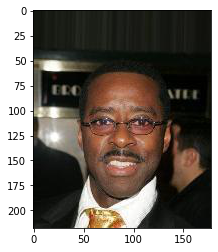

In [13]:
test_list = os.listdir(TEST_IMAGES_DIR)
test_paths = {test[:-4]: os.path.join(TEST_IMAGES_DIR, test) for test in test_list if test[-4:] == '.jpg'}
test_imgs = {name[:-4]: np.asarray(PIL.Image.open(test)) for name, test in zip(test_list, test_paths.values())}
plt.imshow(test_imgs['095706'])
print(test_paths['095706'])

/home/jho/projects/image-segmentation-keras/dataset/celeba_/test/mask/095706.bmp


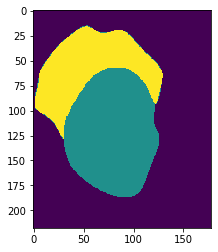

In [14]:
mask_list = os.listdir(TEST_ANNOTATIONS_DIR)
mask_list = [mask for mask in mask_list  if mask[-4:] == '.bmp']
mask_paths = {mask[:-4]: os.path.join(TEST_ANNOTATIONS_DIR, mask) for mask in mask_list}
mask_imgs = {name[:-4]: np.asarray(PIL.Image.open(mask)) for name, mask in zip(mask_list, mask_paths.values())}
plt.imshow(mask_imgs['095706'])
print(mask_paths['095706'])


# Blur TestDataset...

In [15]:
print(np.unique(np.where(mask_imgs['126820']==1, mask_imgs['126820'], 0)))

[0 1]


blurring...:  10%|▉         | 39/399 [00:00<00:00, 383.94it/s]

399


blurring...: 100%|██████████| 399/399 [00:00<00:00, 411.33it/s]


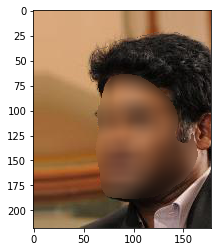

In [16]:
import cv2

_mask_blurs={}
items = []
for item in mask_imgs.keys():
    if item in test_imgs.keys():
        items.append(item)
print(len(items))
for id_ in tqdm.tqdm(items, desc="blurring..."):
    st = test_imgs[id_]
    sm = mask_imgs[id_]
    cvt_ms = np.where(sm==1, sm, 0)
    _, _, _, _mask_blurs[id_] = blur(st, cvt_ms)
    blur_mask_dir = os.path.join(BLUR_DIR, 'mask')
    
    if not os.path.exists(blur_mask_dir):
        os.makedirs(blur_mask_dir)
    plt.imshow(_mask_blurs[id_])
#     print(_mask_blurs[id_])
    
    m_path = os.path.join(blur_mask_dir, id_ + '.jpg')
#     print(m_path)
    
    cv2.imwrite(m_path, cv2.cvtColor(_mask_blurs[id_], cv2.COLOR_RGB2BGR))

In [17]:
# from keras_segmentation.predict import blur3 as blbl

# mask_blur_dir =  os.path.join(BLUR_DIR, 'mask')

# _id = '095706'

# sample_test_img = test_imgs[_id]
# sample_mask_img = mask_imgs[_id]
# cvt_mask = np.where(sample_mask_img==1, sample_mask_img, 0)

# plt.imshow(cvt_mask[:,:])
# print(cvt_mask.shape)


In [18]:
# # Stop...
# ..

In [19]:
# def bbb(model, img_dir, mask_dir, out_dir, save=False):
#     print(model)
#     out = os.path.join(out_dir, model)
#     print(out)
#     if not os.path.exists(out):
#         os.makedirs(out)
       
#     blurs = blur_multiple(imgs=None, img_dir=img_dir, inps=None, inp_dir=mask_dir, out_dir=out, save=save)
    
     
#     return blurs

# blurs = {}
# models.append('mask')
# for model in models:
#     mask_dir = os.path.join(BEST_DIR, model)
#     blurs[model] = bbb(model, TEST_IMAGES_DIR, mask_dir=mask_dir, out_dir=BLUR_DIR, save=True)

In [20]:
iou = {}
mean_iou = {}
face_iou = {}
for model in tqdm.tqdm(models, desc='model'):
    print(model)
    _iou = evaluations[model]['class_wise_IU(IoU)']
    mean_iou = evaluations[model]['mean_IU']
    
    bg_iou = _iou[0]
    face_iou = _iou[1]
    hair_iou = _iou[2]

    iou[model] = {}
    iou[model]['mean'] = mean_iou
    iou[model]['bg'] = bg_iou
    iou[model]['face'] = face_iou
    iou[model]['hair'] = hair_iou

model: 100%|██████████| 10/10 [00:00<00:00, 11932.59it/s]

fcn_32
fcn_32_vgg16
pspnet
fcn_8_vgg16
unet
unet_vgg16
segnet
fcn_8
segnet_vgg16
pspnet_vgg16


In [21]:
iou

{'fcn_32': {'mean': 0.8230446471670144,
  'bg': 0.9060413546122709,
  'face': 0.876723121214499,
  'hair': 0.6863694656742735},
 'fcn_32_vgg16': {'mean': 0.836138733456186,
  'bg': 0.9180697451246111,
  'face': 0.8545831152717184,
  'hair': 0.7357633399722281},
 'pspnet': {'mean': 0.8297138550963821,
  'bg': 0.9102702296561949,
  'face': 0.8852621581775698,
  'hair': 0.6936091774553813},
 'fcn_8_vgg16': {'mean': 0.8871972593594677,
  'bg': 0.9434810956178113,
  'face': 0.9096778468128921,
  'hair': 0.8084328356476997},
 'unet': {'mean': 0.7034001227352461,
  'bg': 0.8459975252623494,
  'face': 0.7180801289271665,
  'hair': 0.5461227140162223},
 'unet_vgg16': {'mean': 0.8885570973969146,
  'bg': 0.943115007773431,
  'face': 0.9105978990579137,
  'hair': 0.8119583853593991},
 'segnet': {'mean': 0.783049843976246,
  'bg': 0.8753577544202236,
  'face': 0.8474048442906574,
  'hair': 0.6263869332178571},
 'fcn_8': {'mean': 0.8246423507863397,
  'bg': 0.9047454625207942,
  'face': 0.877097437

In [22]:
import datetime
CSV_OUT_PATH = os.path.join(PREDICTIONS_DIR, 'evaluations_{:%Y%m%d_%H%M}.csv'.format(datetime.datetime.now()))
print(CSV_OUT_PATH)

/home/jho/projects/image-segmentation-keras/out/predictions/evaluations_20200423_1956.csv


In [23]:
import csv
csv_columns = ['model', 'mean', 'bg', 'face', 'hair']
iou = {k: v for k, v in sorted(iou.items())}
dict_data = []

for model, v in iou.items():
    dict_data.append({
        'model': model, 
        'mean': v['mean'], 
        'bg': v['bg'], 
        'face': v['face'], 
        'hair': v['hair']})
print(dict_data)
with open(CSV_OUT_PATH, 'w') as f:
    w = csv.DictWriter(f, fieldnames=csv_columns)
    w.writeheader()
    for data in dict_data:
        w.writerow(data)
print(CSV_OUT_PATH)

[{'model': 'fcn_32', 'mean': 0.8230446471670144, 'bg': 0.9060413546122709, 'face': 0.876723121214499, 'hair': 0.6863694656742735}, {'model': 'fcn_32_vgg16', 'mean': 0.836138733456186, 'bg': 0.9180697451246111, 'face': 0.8545831152717184, 'hair': 0.7357633399722281}, {'model': 'fcn_8', 'mean': 0.8246423507863397, 'bg': 0.9047454625207942, 'face': 0.8770974372732604, 'hair': 0.6920841525649646}, {'model': 'fcn_8_vgg16', 'mean': 0.8871972593594677, 'bg': 0.9434810956178113, 'face': 0.9096778468128921, 'hair': 0.8084328356476997}, {'model': 'pspnet', 'mean': 0.8297138550963821, 'bg': 0.9102702296561949, 'face': 0.8852621581775698, 'hair': 0.6936091774553813}, {'model': 'pspnet_vgg16', 'mean': 0.8749693918859021, 'bg': 0.9362193087008344, 'face': 0.8997556946755559, 'hair': 0.788933172281316}, {'model': 'segnet', 'mean': 0.783049843976246, 'bg': 0.8753577544202236, 'face': 0.8474048442906574, 'hair': 0.6263869332178571}, {'model': 'segnet_vgg16', 'mean': 0.8462812603801418, 'bg': 0.92659229

## import numpy as np
# import PIL.Image
# import cv2
# import matplotlib.pyplot as plt

# MASK_DIR = os.path.join(PREDICTIONS_DIR, 'best_/mask')
# masks = [os.path.join(MASK_DIR, mask) for mask in os.listdir(MASK_DIR) if mask[-4] == '.']

# imgs = [np.asarray(PIL.Image.open(mask)) for mask in masks]

# plt.imshow(imgs[0])
# print(imgs[0])
# print(np.unique(imgs[0]))

## Sort...

In [25]:
import shutil
import tarfile

# Sort predicts
sort_predict_dir = os.path.join(PREDICTIONS_DIR, 'sorted_predict_{}'.format(NOW))
dir_list = os.listdir(BEST_DIR)
for pre_name in tqdm.tqdm(dir_list, desc="Sorting predictions"):
    print()
    print(pre_name)
    pre_list = os.path.join(BEST_DIR, pre_name)
    if os.path.isdir(pre_list):
        print(pre_list)
        img_list = os.listdir(pre_list)
        for img in img_list:
            if img[-4:] == '.jpg' or img[-4:] == '.bmp':
                ext = img[-3:]
                item = img[:-4]
                before = os.path.join(pre_list, img)
#                 item_dir = os.path.join(AFTER_DIR, item)
                item_dir = os.path.join(sort_predict_dir)
#                 print(item_dir)
                if not os.path.exists(item_dir):
                    os.makedirs(item_dir)
                after = os.path.join(item_dir, '{item}_{model}.{ext}'.format(item=item, model=pre_name, ext=ext))
#                 print(before, ' -> ', after)
                shutil.copy(before, after)
#         img_list = [os.path.join(pre_list, img) if img[-4:] == '.jpg' else None for img in img_list]

            
        print(img_list[0])
        print()
    else:
        print("Not a directory >> " + pre_list)

current_path = os.getcwd()
print(sort_predict_dir)
os.chdir(os.path.join(sort_predict_dir, '..'))
prediction_tar_path = os.path.join(os.getcwd(),'sorted_predict_{}.{}'.format(NOW, 'tar.gz'))
with tarfile.open(prediction_tar_path, mode='w:gz') as taf:
    taf.add('sorted_predict_{}'.format(NOW))

os.chdir(current_path)

print(os.path.abspath(prediction_tar_path))



Sorting predictions:  40%|████      | 4/10 [00:00<00:00, 36.47it/s]


pspnet_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/pspnet_vgg16
097606.jpg


segnet_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/segnet_vgg16
097606.jpg


fcn_8
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/fcn_8
097606.jpg


fcn_32
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/fcn_32
097606.jpg


fcn_8_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/fcn_8_vgg16
097606.jpg


fcn_32_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/fcn_32_vgg16
097606.jpg


segnet
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/segnet
097606.jpg


unet
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/unet


Sorting predictions: 100%|██████████| 10/10 [00:00<00:00, 36.30it/s]


097606.jpg


unet_vgg16
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/unet_vgg16
097606.jpg


pspnet
/home/jho/projects/image-segmentation-keras/out/predictions/predcition_195231/pspnet
097606.jpg

/home/jho/projects/image-segmentation-keras/out/predictions/sorted_predict_195231
/home/jho/projects/image-segmentation-keras/out/predictions/sorted_predict_195231.tar.gz


In [26]:
# Sort blurs
sort_blur_dir = os.path.join(PREDICTIONS_DIR, 'sorted_blur_{}'.format(NOW))
print(sort_blur_dir)
blur_dir = BLUR_DIR
dir_list = os.listdir(blur_dir)
for pre_name in tqdm.tqdm(dir_list, desc="Sorting blur".format(pre_name=pre_name)):
#     print(pre_name)
    pre_list = os.path.join(blur_dir, pre_name)
    if os.path.isdir(pre_list):
#         print(pre_list)
        img_list = os.listdir(pre_list)
        
        for img in img_list:
            if img[-4:] == '.jpg' or img[-4:] == '.bmp':
                ext = img[-3:]
                item = img[:-4]
                before = os.path.join(pre_list, img)
#                 item_dir = os.path.join(AFTER_DIR, item)
                item_dir = os.path.join(sort_blur_dir)
                if not os.path.exists(item_dir):
                    os.makedirs(item_dir)
                after = os.path.join(item_dir, '{item}_{model}.{ext}'.format(item=item, model=pre_name, ext=ext))
#                 after = os.path.join(AFTER_DIR, '{item}_{model}.{ext}'.format(item=item, model=pre_name, ext=ext))
#                 print(before, ' -> ', after)
                shutil.copy(before, after)
#         img_list = [os.path.join(pre_list, img) if img[-4:] == '.jpg' else None for img in img_list]

    else:
        print("Not a directory >> " + pre_list)
    print()
    
current_path = os.getcwd()
print(sort_blur_dir)
os.chdir(os.path.join(sort_blur_dir, '..'))
blur_tar_path = os.path.join(os.getcwd(),'sorted_blur_{}.{}'.format(NOW, 'tar.gz'))
with tarfile.open(blur_tar_path, mode='w:gz') as taf:
    taf.add('sorted_blur_{}'.format(NOW))

os.chdir(current_path)

print(os.path.abspath(blur_tar_path))


Sorting blur:  36%|███▋      | 4/11 [00:00<00:00, 36.54it/s]

/home/jho/projects/image-segmentation-keras/out/predictions/sorted_blur_195231









Sorting blur: 100%|██████████| 11/11 [00:00<00:00, 37.21it/s]






/home/jho/projects/image-segmentation-keras/out/predictions/sorted_blur_195231
/home/jho/projects/image-segmentation-keras/out/predictions/sorted_blur_195231.tar.gz


In [27]:
samb = np.asarray(PIL.Image.open('/home/jho/projects/image-segmentation-keras/out/predictions/_best/027004/027004_fcn_8_vgg16.jpg'))

In [28]:
samb

array([[[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       [[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       [[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       ...,

       [[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  8,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       [[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  0,   2, 254],
        [  0,   0, 254],
        [  0,   0, 254]],

       [[  0,   0, 254],
        [  0,   0, 254],
        [  0,   0, 254],
        ...,
        [  0,   5, 254],
        [  0,   0, 254],
        [  0,   0, 254]]

In [29]:
.
def load_predictions(models):
    pred = {}
    for model in models:
        dir_path = _predictions_(model)
        items = os.listdir(dir_path)
        pred[model] = {}
        for item in items:
            pred[model][item[:-4]] = os.path.join(dir_path, item)
    return pred

SyntaxError: invalid syntax (<ipython-input-29-70122fb16acd>, line 1)

In [ ]:
pred = load_predictions(models)

In [ ]:
print(list(pred['mask'].keys())[0])

In [ ]:
def visualize(pred, model, item):
    plt.imshow(PIL.Image.open(pred[model][item]))



In [ ]:
visualize(pred, 'unet', '095706')

In [ ]:
items = {}
for name, model in pred.items():
    items[name] = {}
    for item, img_path in model.items():
        items[name][item] = np.asarray(PIL.Image.open(img_path))

In [ ]:
items['unet']

In [ ]:
items['original']

In [ ]:
items['mask']['095706'][50:70, 50:70]

In [ ]:
items['mask']['095706'].shape

In [ ]:
items['unet']['095706'].shape

In [ ]:
items['unet']['095706'][50:70, 50:70, :]

In [ ]:
items['unet']['095706'][10:30, 10:30, :]

In [ ]:
def convert(arr, _from, _to):
    _arr = np.where(arr, _from, _to, arr)
    return _arr

In [ ]:
convert(items['unet']['095706'], [[20, 215, 198], [184, 244, 156], , )

In [ ]:
_img = PIL.Image.fromarray(items['unet']['095706'])

In [ ]:
plt.imshow(_img)

In [ ]:
print(np.asarray(_img))

In [ ]:
_uni = np.asarray(np.unique(_img, return_counts=True)).T

In [ ]:
print(len(_uni))
print(_uni)